# ResNet50 Keras model on CIFAR10 - TF2.X

In [ ]:
# tensorflow version=1.13 gpu and cuda 10.0

import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
config.log_device_placement = True
sess = tf.Session(config=config)
set_session(sess)

In [1]:
import tensorflow as tf
print(tf.__version__)
!python --version

2.5.0
Python 3.7.11


In [6]:
import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#keras.__version__ # update keras to the version >= 2.2.0

In [3]:
batch_size = 32
num_classes = 10
epochs = 10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

170500096/170498071 [==============================] - 7s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [4]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [7]:
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [8]:
base_model = ResNet50(weights=None,include_top=False, input_shape=(x_train.shape[1],x_train.shape[2],3), classes=num_classes)

## Keras functional approach

In [10]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.7)(x)
pred = Dense(num_classes, activation='softmax')(x)
model = Model(inputs = base_model.input, outputs=pred)

In [11]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 38, 38, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 16, 16, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 16, 16, 64)   256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [12]:
optimizer = Adam(lr=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [13]:
callbacks = [EarlyStopping(monitor='val_acc', patience=10)]

In [14]:
history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              verbose=1,
              callbacks=callbacks)

Epoch 1/10
1563/1563 [==============================] - 107s 45ms/step - loss: 3.5694 - accuracy: 0.1839 - val_loss: 2.4455 - val_accuracy: 0.3221
Epoch 2/10
1563/1563 [==============================] - 68s 43ms/step - loss: 2.3940 - accuracy: 0.2974 - val_loss: 1.8969 - val_accuracy: 0.3914
Epoch 3/10
1563/1563 [==============================] - 69s 44ms/step - loss: 2.1775 - accuracy: 0.3490 - val_loss: 1.6643 - val_accuracy: 0.4000
Epoch 4/10
1563/1563 [==============================] - 67s 43ms/step - loss: 2.0423 - accuracy: 0.3693 - val_loss: 1.7740 - val_accuracy: 0.3990
Epoch 5/10
1563/1563 [==============================] - 67s 43ms/step - loss: 1.8285 - accuracy: 0.4242 - val_loss: 2.1176 - val_accuracy: 0.4067
Epoch 6/10
1563/1563 [==============================] - 69s 44ms/step - loss: 1.7019 - accuracy: 0.4620 - val_loss: 2.0474 - val_accuracy: 0.4991
Epoch 7/10
1563/1563 [==============================] - 67s 43ms/step - loss: 1.5846 - accuracy: 0.5049 - val_loss: 1.6472 

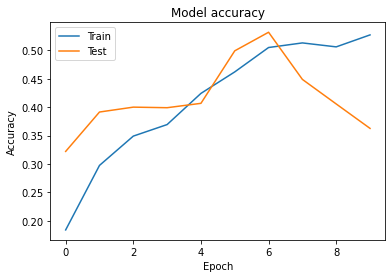

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

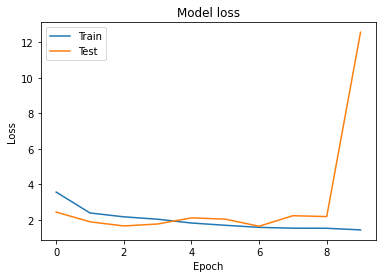

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

## Reference:
- https://keras.io/api/applications/